<a href="https://colab.research.google.com/github/VAbhishek12/excelr/blob/main/simplelinearegression/Simple_Linear_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Delivery_time -> Predict delivery time using sorting time

In [ ]:
# importing the libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
# importing the data set
# data set name : (Delevery_time.csv)
df = pd.read_csv("delivery_time.csv")
df.shape # it is used to know total number of rows and columns present in the data set

(21, 2)

In [ ]:
df.head() # used to represent first 5 rows of the dataset
df.describe() #describe the whole date like(mean,std,min,max ect.)

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [ ]:
#assigning x and y
y = df[["Delivery Time"]]
x = df[["Sorting Time"]]

In [ ]:
#fitting the model using linear regression.
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x,y)

LinearRegression()

In [ ]:
#finding values of interception and coeficient.
#B0
print("Intercept value:",LR.intercept_)
#B1
print("cofficient value:",LR.coef_)

Intercept value: [6.58273397]
cofficient value: [[1.6490199]]


In [ ]:
#predicting the y
y_pred = LR.predict(x)
y_pred

array([[23.07293294],
       [13.17881356],
       [16.47685335],
       [21.42391304],
       [23.07293294],
       [16.47685335],
       [18.12587325],
       [11.52979366],
       [23.07293294],
       [21.42391304],
       [19.77489315],
       [13.17881356],
       [18.12587325],
       [11.52979366],
       [11.52979366],
       [13.17881356],
       [16.47685335],
       [18.12587325],
       [ 9.88077377],
       [18.12587325],
       [14.82783346]])

In [ ]:
y

,Delivery Time
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00
5,15.35
6,19.00
7,9.50
8,17.90
9,18.75


[]

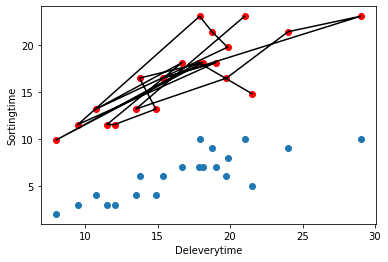

In [ ]:
#ploting the graph
plt.scatter(df["Delivery Time"],df["Sorting Time"])
plt.scatter(df["Delivery Time"],y_pred, color = "Red")
plt.plot(df["Delivery Time"],y_pred, color = "black")
plt.xlabel("Deleverytime")
plt.ylabel("Sortingtime")
plt.plot()

In [ ]:
#finding the mean square error
mse = mean_squared_error(y,y_pred)
print("mean squared error:",mse.round(2))

mean squared error: 7.79


In [ ]:
#finding the root mean squuare error
RMSE = np.sqrt(mse)
print("root mean square error:",RMSE.round(2))

root mean square error: 2.79


In [ ]:
#finding the rsquare..
r2 = r2_score(y,y_pred)
print("r sqyare:",r2.round(2))

r sqyare: 0.68


In [ ]:
# standardization is making our data in between -3 to +3
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_x = SS.fit_transform(x)
SS_x = pd.DataFrame(SS_x)
SS_x.columns = list(x)
SS_x.head()


,Sorting Time
0,1.535625
1,-0.882984
2,-0.076781
3,1.132523
4,1.535625


In [ ]:
# Data partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(SS_x,y, test_size=0.30)

# model fitting
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

LR.fit(X_train,Y_train)
Y_pred_train = LR.predict(X_train)
Y_pred_test = LR.predict(X_test)

from sklearn.metrics import mean_squared_error
er1 = np.sqrt(mean_squared_error(Y_train,Y_pred_train))
er2 = np.sqrt(mean_squared_error(Y_test,Y_pred_test))
print("Training Error: ", er1.round(2))
print("Testing Error: ", er2.round(2))

Training Error:  2.76
Testing Error:  3.06


In [ ]:
# Cross Validation Method...
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
from sklearn.model_selection import train_test_split

training_error = []
test_error = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(SS_x,y, test_size = 0.30,random_state = i)
    LR.fit(X_train,Y_train)
    Y_pred_train = LR.predict(X_train)
    Y_pred_test = LR.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)))


print("Cross Validation Training error:",np.mean(training_error).round(2))
print("Cross validation Tests error:",np.mean(test_error).round(2))

Cross Validation Training error: 2.69
Cross validation Tests error: 3.09


# Salary_hike -> Build a prediction model for Salary_hike


In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
#importing the data set
df = pd.read_csv("Salary_Data.csv")
df.shape

(30, 2)

In [ ]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
x = df[["YearsExperience"]]
y = df[["Salary"]]

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x,y)

LinearRegression()

In [ ]:
#B0
print("Intercept value:",LR.intercept_)
#B1
print("cofficient value:",LR.coef_)

Intercept value: [25792.20019867]
cofficient value: [[9449.96232146]]


In [ ]:
y_pred = LR.predict(x)
y_pred

array([[ 36187.15875227],
       [ 38077.15121656],
       [ 39967.14368085],
       [ 44692.12484158],
       [ 46582.11730587],
       [ 53197.09093089],
       [ 54142.08716303],
       [ 56032.07962732],
       [ 56032.07962732],
       [ 60757.06078805],
       [ 62647.05325234],
       [ 63592.04948449],
       [ 63592.04948449],
       [ 64537.04571663],
       [ 68317.03064522],
       [ 72097.0155738 ],
       [ 73987.00803809],
       [ 75877.00050238],
       [ 81546.97789525],
       [ 82491.9741274 ],
       [ 90051.94398456],
       [ 92886.932681  ],
       [100446.90253816],
       [103281.8912346 ],
       [108006.87239533],
       [110841.86109176],
       [115566.84225249],
       [116511.83848464],
       [123126.81210966],
       [125016.80457395]])

In [ ]:
y

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


[]

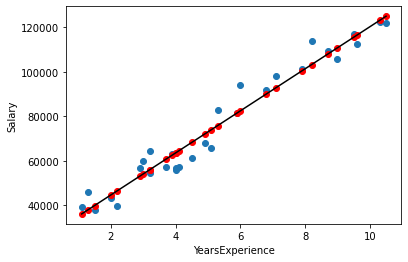

In [ ]:
plt.scatter(df["YearsExperience"],df["Salary"])
plt.scatter(df["YearsExperience"],y_pred, color = "Red")
plt.plot(df["YearsExperience"],y_pred, color = "black")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.plot()

In [ ]:
mse = mean_squared_error(y,y_pred)
print("mean squared error:",mse.round(2))

mean squared error: 31270951.72


In [ ]:
RMSE = np.sqrt(mse)
print("root mean square error:",RMSE.round(2))

root mean square error: 5592.04


In [ ]:
r2 = r2_score(y,y_pred)
print("r square:",r2.round(2))

r square: 0.96


In [ ]:
# standardization is making our data in between -3 to +3
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_x = SS.fit_transform(x)
SS_x = pd.DataFrame(SS_x)
SS_x.columns = list(x)
SS_x.head()

,YearsExperience
0,-1.510053
1,-1.438373
2,-1.366693
3,-1.187494
4,-1.115814


In [ ]:
# Data partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(SS_x,y, test_size=0.30)

# model fitting
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

LR.fit(X_train,Y_train)
Y_pred_train = LR.predict(X_train)
Y_pred_test = LR.predict(X_test)

from sklearn.metrics import mean_squared_error
er1 = np.sqrt(mean_squared_error(Y_train,Y_pred_train))
er2 = np.sqrt(mean_squared_error(Y_test,Y_pred_test))
print("Training Error: ", er1.round(2))
print("Testing Error: ", er2.round(2))

Training Error:  5899.9
Testing Error:  4963.72


In [ ]:
# Cross Validation Method...
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
from sklearn.model_selection import train_test_split

training_error = []
test_error = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(SS_x,y, test_size = 0.30,random_state = i)
    LR.fit(X_train,Y_train)
    Y_pred_train = LR.predict(X_train)
    Y_pred_test = LR.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)))


print("Cross Validation Training error:",np.mean(training_error).round(2))
print("Cross validation Tests error:",np.mean(test_error).round(2))

Cross Validation Training error: 5592.55
Cross validation Tests error: 5736.87
